# Power-law (gamma) transformations
Power-law (gamma) transformations can be mathematically expressed as s = cr^{\gamma}. Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion. 

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [12]:
Originalimage=cv.imread("powerLog.tif",1)
print(Originalimage)

None


In [9]:
c=255
gamma=0.1
s=(c*(Originalimage)**gamma)
gamma_image_A=np.array(s, dtype= 'uint8')
    

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'float'

TypeError: Image data of dtype object cannot be converted to float

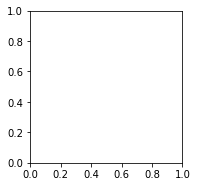

In [4]:
plt.subplot(121)
plt.imshow(Originalimage)
plt.title(" Intensity ramp image")
plt.axis("OFF")
plt.subplot(122)
plt.imshow(gamma_image_A)
plt.title("")
plt.axis("OFF")

(-0.5, 511.5, 511.5, -0.5)

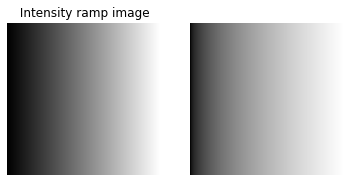

In [70]:
c=255
gamma=0.5
s=(c*(Originalimage/255)**gamma)
gamma_image_B=np.array(s, dtype= 'uint8')

plt.subplot(121)
plt.imshow(Originalimage)
plt.title(" Intensity ramp image")
plt.axis("OFF")
plt.subplot(122)
plt.imshow(gamma_image_B)
plt.title("")
plt.axis("OFF")

(-0.5, 511.5, 511.5, -0.5)

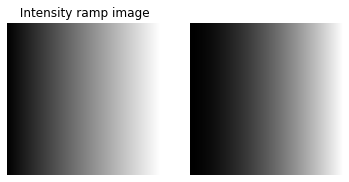

In [71]:
c=255
gamma=1.5
s=(c*(Originalimage/255)**gamma)
gamma_image_C=np.array(s, dtype= 'uint8')

plt.subplot(121)
plt.imshow(Originalimage)
plt.title(" Intensity ramp image")
plt.axis("OFF")
plt.subplot(122)
plt.imshow(gamma_image_C)
plt.title("")
plt.axis("OFF")

(-0.5, 511.5, 511.5, -0.5)

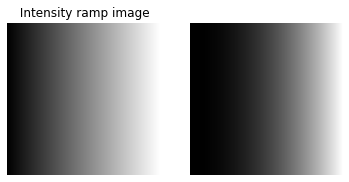

In [72]:
c=255
gamma=2.0
s=(c*(Originalimage/255)**gamma)
gamma_image_D=np.array(s, dtype= 'uint8')

plt.subplot(121)
plt.imshow(Originalimage)
plt.title(" Intensity ramp image")
plt.axis("OFF")
plt.subplot(122)
plt.imshow(gamma_image_D)
plt.title("")
plt.axis("OFF")

gamma=[0.1, 0.5, 1.2, 2.2]

c=255

for i in gamma:
    s=(c*(Originalimage)**gamma)
    gamma_image=np.array(s, dtype= 'uint8')
    

(-0.5, 511.5, 511.5, -0.5)

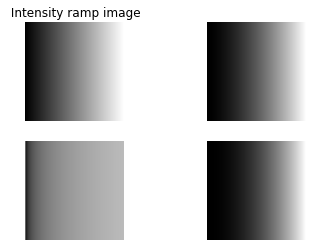

In [73]:
plt.subplot(221)
plt.imshow(Originalimage)
plt.title(" Intensity ramp image")
plt.axis("OFF")
plt.subplot(223)
plt.imshow(gamma_image_A)
plt.title("")
plt.axis("OFF")
plt.subplot(222)
plt.imshow(gamma_image_C)
plt.title(" ")
plt.axis("OFF")
plt.subplot(224)
plt.imshow(gamma_image_D)
plt.title("")
plt.axis("OFF")

In [74]:
row, column, channel= Originalimage.shape
new_image=np.ones((row,column,channel), dtype=int)

print(row)

512


In [75]:
c=255
gamma=2
for i in range(row):
    for j in range(column):
        for k in range(channel):
            r=Originalimage[i][j][k]
            s=c*(r**gamma)
            #print(r)
            new_image[i][j][k]=s



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

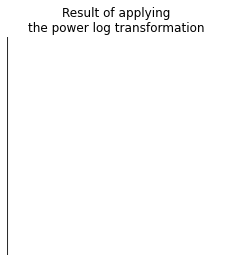

In [76]:
plt.imshow(new_image)
plt.title("Result of applying\nthe power log transformation")
plt.axis("OFF")

# MRI Image

In [77]:
mriImage=cv.imread('mri.tif')
print(2)

2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


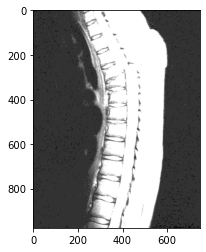

In [78]:
row, column, channel= mriImage.shape
gamma_image=np.ones((row,column,channel), dtype=int)
c=50
gamma=0.6
for i in range(row):
    for j in range(column):
        for k in range(channel):
            r=mriImage[i][j][k]
            s=c*(r**gamma)
            #print(r)
            gamma_image[i][j][k]=s
            
            
plt.imshow(gamma_image)

In [85]:
washed_out_img=cv.imread('washed_out_aerial_image.tif')

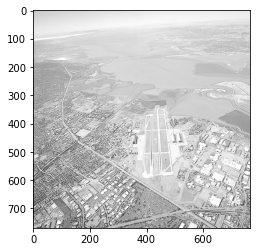

In [80]:
row, column, channel= washed_out_img.shape
gamma_image=np.ones((row,column,channel), dtype=int)
c=255
gamma=1

washed_out_img=washed_out_img / 255
for i in range(row):
    for j in range(column):
        for k in range(channel):
            r=washed_out_img[i][j][k]
            s=c*(r**gamma)
            #print(r)
            gamma_image[i][j][k]=s
            
            
plt.imshow(gamma_image)

In [86]:
washed_out_img=cv.imread('washed_out_aerial_image.tif')

In [93]:
# Trying 4 gamma values.
i=1
for gamma in [3, 4, 5]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(washed_out_img / 255) ** gamma, dtype = 'uint8')
    
    # Save edited images.
    cv.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

(-0.5, 764.5, 768.5, -0.5)

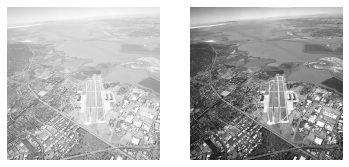

In [105]:
fig,axarr = plt.subplots(2,2)
plt.subplot(121)
plt.imshow(washed_out_img)
plt.axis('off')
plt.subplot(122)
gamma_corrected3=cv.imread('gamma_transformed3.jpg')
plt.imshow(gamma_corrected3)

plt.axis('off')

(-0.5, 764.5, 768.5, -0.5)

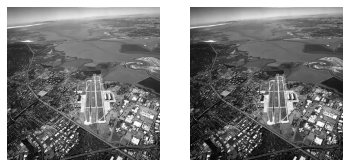

In [117]:
fig,axarr = plt.subplots(2,2)
gamma_corrected4=cv.imread('gamma_transformed4.jpg')
plt.subplot(121)
plt.imshow(gamma_corrected4)
plt.axis('off')
gamma_corrected5=cv.imread('gamma_transformed5.jpg')
plt.subplot(122)
plt.imshow(gamma_corrected5)
plt.axis('off')

In [118]:

fig.savefig('faces.png')

In [120]:
gamma_corrected4=cv.imread('gamma_transformed4.jpg')
im_rgb=cv.cvtColor(gamma_corrected4,cv.COLOR_GRAY2RGB)
plt.subplot(121)
plt.imshow(im_rgb)

error: OpenCV(4.5.1) c:\users\appveyor\appdata\local\temp\1\pip-req-build-xeqjxthj\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__thiscall cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x5c011cb9::Set<3,4,-1>,struct cv::impl::A0x5c011cb9::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [ ]:
file:///F:/1sh/DIP/DIP%20Book.pdf
        
        
https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/?ref=lbp
    
https://www.geeksforgeeks.org/perspective-transformation-python-opencv/?ref=rp
    
    
https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/